# Aula 1 - Python em Aplicações ambientais

Importar pandas para ler o arquivo .CSV

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\marcos perrude\Documents\ENS410064\dados\PRcsv.csv", encoding='latin1')


In [9]:
# Extraindo o diretório que estamos trabalhando
cwd = os.getcwd()

print('Diretório atual: ' + cwd)


# Estabelecendo a pasta de dados que quero utilizar
dataPath = os.path.dirname(cwd) +'\\dados'
df = os.path.join(dataPath, 'PRcsv.csv')
df = pd.read_csv(df, encoding='latin1')
print('Diretório de dados:' + dataPath)


Diretório atual: C:\Users\marcos perrude\Documents\ENS410064\scripts
Diretório de dados:C:\Users\marcos perrude\Documents\ENS410064\dados


In [14]:
#Transformar a coluna 'Valor' em Float e retirar as cedulas com 'insufic'
df['Valor'] = df['Valor'].replace(['insufic'], np.nan)
df['Valor'] = df['Valor'].astype('float')

#Criando um datetime
df['datetime'] = pd.to_datetime(df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join,axis =1), format = '%Y-%m-%d-%H-%M')
df = df.set_index("datetime")

In [16]:
df.head()

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia


In [28]:
#Filtrar apenas os poluentes d estação PR_012
df_PR012= df.query('Codigo == "PR_012"')

#Analisar quais poluentes copnstam nos dados
print(df_PR012['Poluente'].unique())
print(df_PR012['Unidade'].unique())

['CO' 'NO2' 'PM25' 'PM10']
['ppm' 'ppb' 'µg/m3']


In [29]:
for poluente in df_PR012['Poluente'].unique():
    unidades = df_PR012[df_PR012['Poluente'] == poluente]['Unidade'].unique()
    print(f'Poluente: {poluente}, Unidade: {unidades}')

Poluente: CO, Unidade: ['ppm']
Poluente: NO2, Unidade: ['ppb']
Poluente: PM25, Unidade: ['µg/m3']
Poluente: PM10, Unidade: ['µg/m3']


In [26]:
df_co = df_PR012.query('Poluente =="CO"')
df_no2 = df_PR012.query('Poluente =="NO2"')
df_pm10 = df_PR012.query('Poluente == "PM10"')
df_PM25 = df_PR012.query('Poluente == "PM25"')

C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_13380\1090036610.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


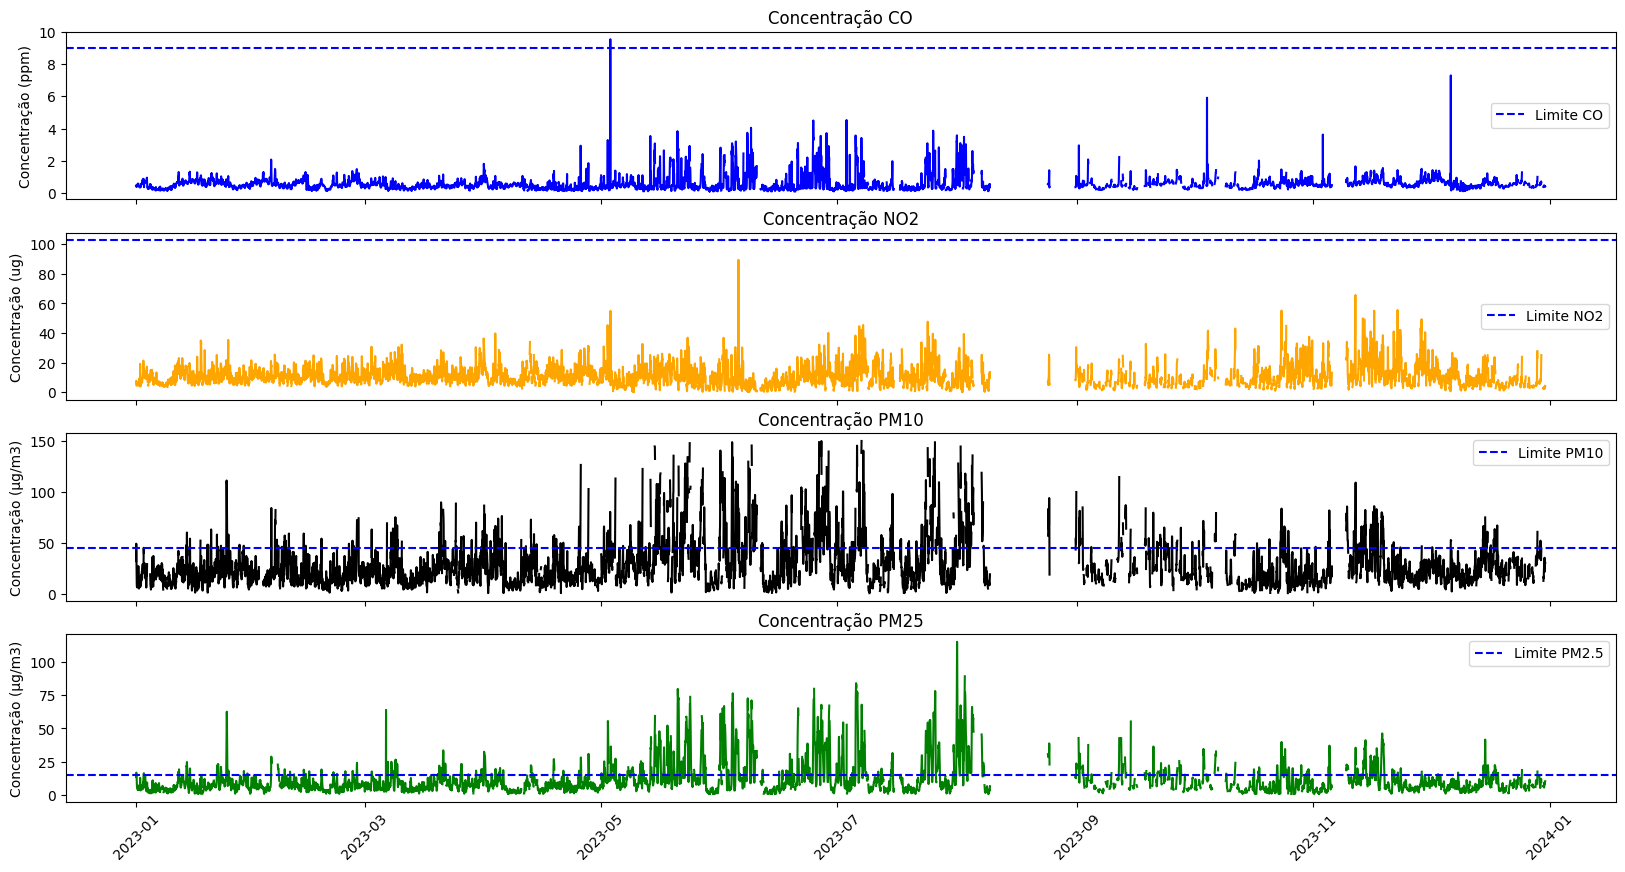

In [44]:
fig,ax = plt.subplots(4,sharex=True, figsize = (20,10))
ax[0].plot(df_co.index,df_co['Valor'],color = 'blue')
ax[1].plot(df_no2.index,df_no2['Valor'],color='orange')
ax[2].plot(df_pm10.index,df_pm10['Valor'],color='black')
ax[3].plot(df_PM25.index,df_PM25['Valor'],color='green')
ax[3].tick_params(axis='x', rotation=45)

plt.legend()

ax[0].axhline(y= 9, color='blue', linestyle='--', label='Limite CO')
ax[1].axhline(y=102.79, color='blue', linestyle='--', label='Limite NO2')
ax[2].axhline(y=45, color='blue', linestyle='--', label='Limite PM10')
ax[3].axhline(y=15 , color='blue', linestyle='--', label='Limite PM2.5')

ax[0].set_title('Concentração CO')
ax[0].set_ylabel('Concentração (ppm)')
ax[0].set_label('Concentração de CO na estação PR_012 em 2023')
ax[0].legend()

ax[1].set_title('Concentração NO2')
ax[1].set_ylabel('Concentração (ug)')
ax[1].set_label('Concentração de NO2 na estação PR_012 em 2023')
ax[1].legend()

ax[2].set_title('Concentração PM10')
ax[2].set_ylabel('Concentração (µg/m3)')
ax[2].set_label('Concentração de PM10 na estação PR_012 em 2023')
ax[2].legend()

ax[3].set_title('Concentração PM25')
ax[3].set_ylabel('Concentração (µg/m3)')
ax[3].set_label('Concentração de PM25 na estação PR_012 em 2023')
ax[3].legend()

plt.show()

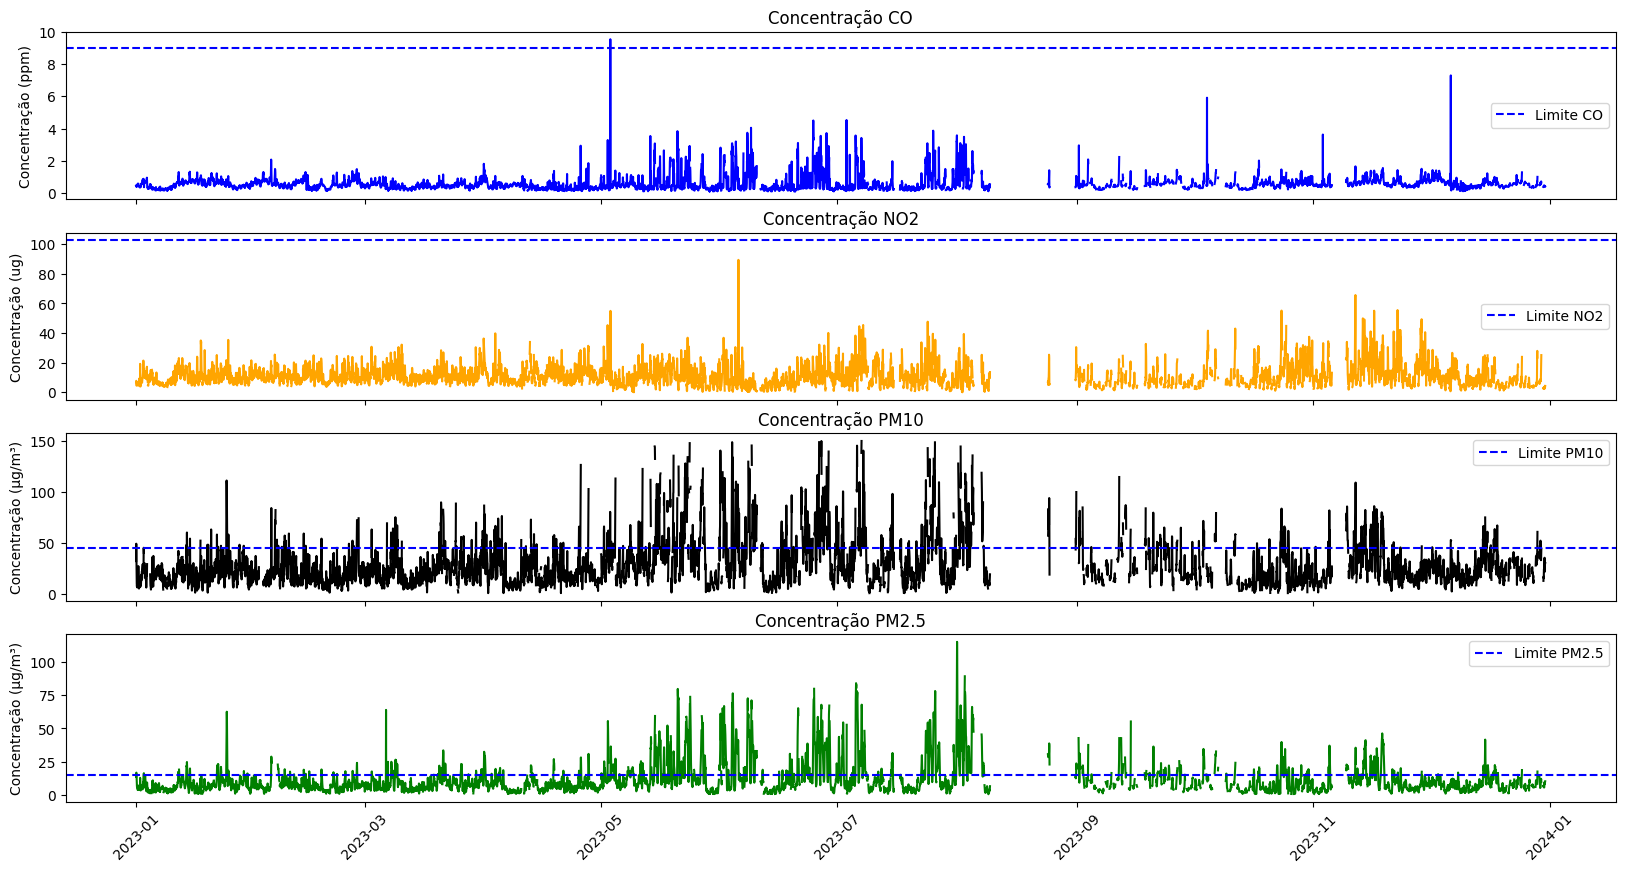

In [45]:
data = [
    (df_co, 'Concentração CO', 'Concentração (ppm)', 9, 'blue'),
    (df_no2, 'Concentração NO2', 'Concentração (ug)', 102.79, 'orange'),
    (df_pm10, 'Concentração PM10', 'Concentração (µg/m³)', 45, 'black'),
    (df_PM25, 'Concentração PM2.5', 'Concentração (µg/m³)', 15, 'green')
]

# Criando subplots
fig, ax = plt.subplots(4, sharex=True, figsize=(20, 10))

# Loop para plotar cada gráfico
for i, (df, title, ylabel, limite, color) in enumerate(data):
    ax[i].plot(df.index, df['Valor'], color=color)
    ax[i].axhline(y=limite, color='blue', linestyle='--', label=f'Limite {title.split()[1]}')
    ax[i].set_title(title)
    ax[i].set_ylabel(ylabel)
    ax[i].legend()

# Ajustando o eixo x do último subplot
ax[3].tick_params(axis='x', rotation=45)

plt.show()

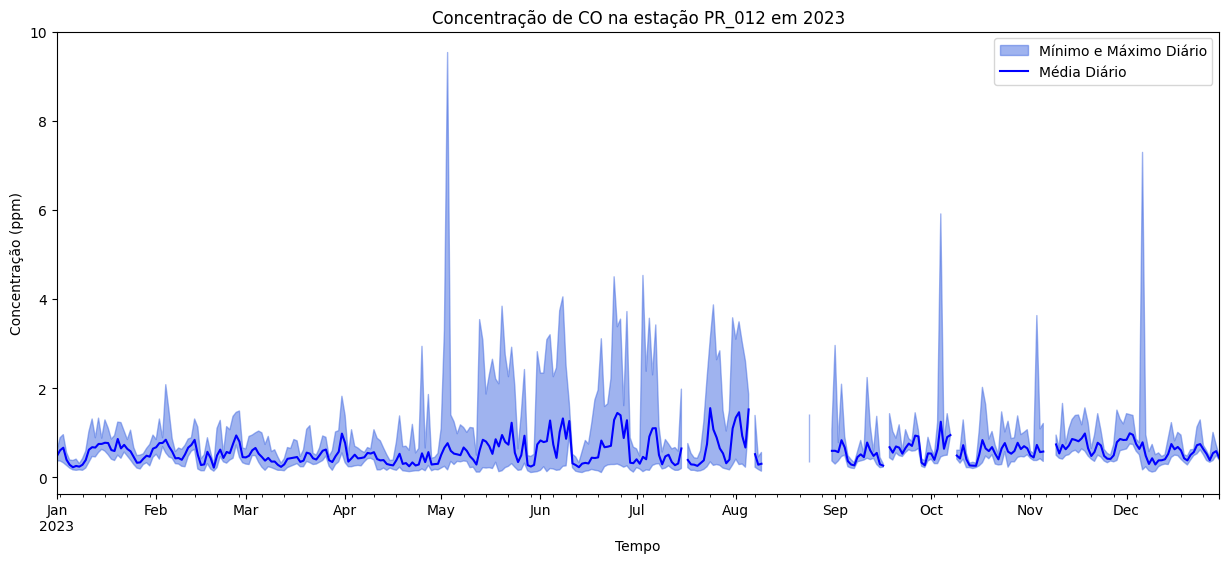

In [37]:
# Calcula a média, mínima e máxima diária
media_diaria_co = df_co['Valor'].resample('D').mean()  #Resample('D'),reamostrar os dados em uma base diária e calculua a media
min_diaria_co = df_co['Valor'].resample('D').min()
max_diaria_co = df_co['Valor'].resample('D').max()

plt.figure(figsize=(15, 6))

# Área sombreada entre os valores mínimo e máximo
plt.fill_between(min_diaria_co.index, min_diaria_co, max_diaria_co, color='royalblue', alpha=0.5, label='Mínimo e Máximo Diário')

# Plota a média diária
media_diaria_co.plot(color='blue', legend=True, label='Média Diário')

plt.xlabel('Tempo')
plt.ylabel('Concentração (ppm)')
plt.title('Concentração de CO na estação PR_012 em 2023')
plt.legend()
plt.show()

C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_13380\3602086161.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


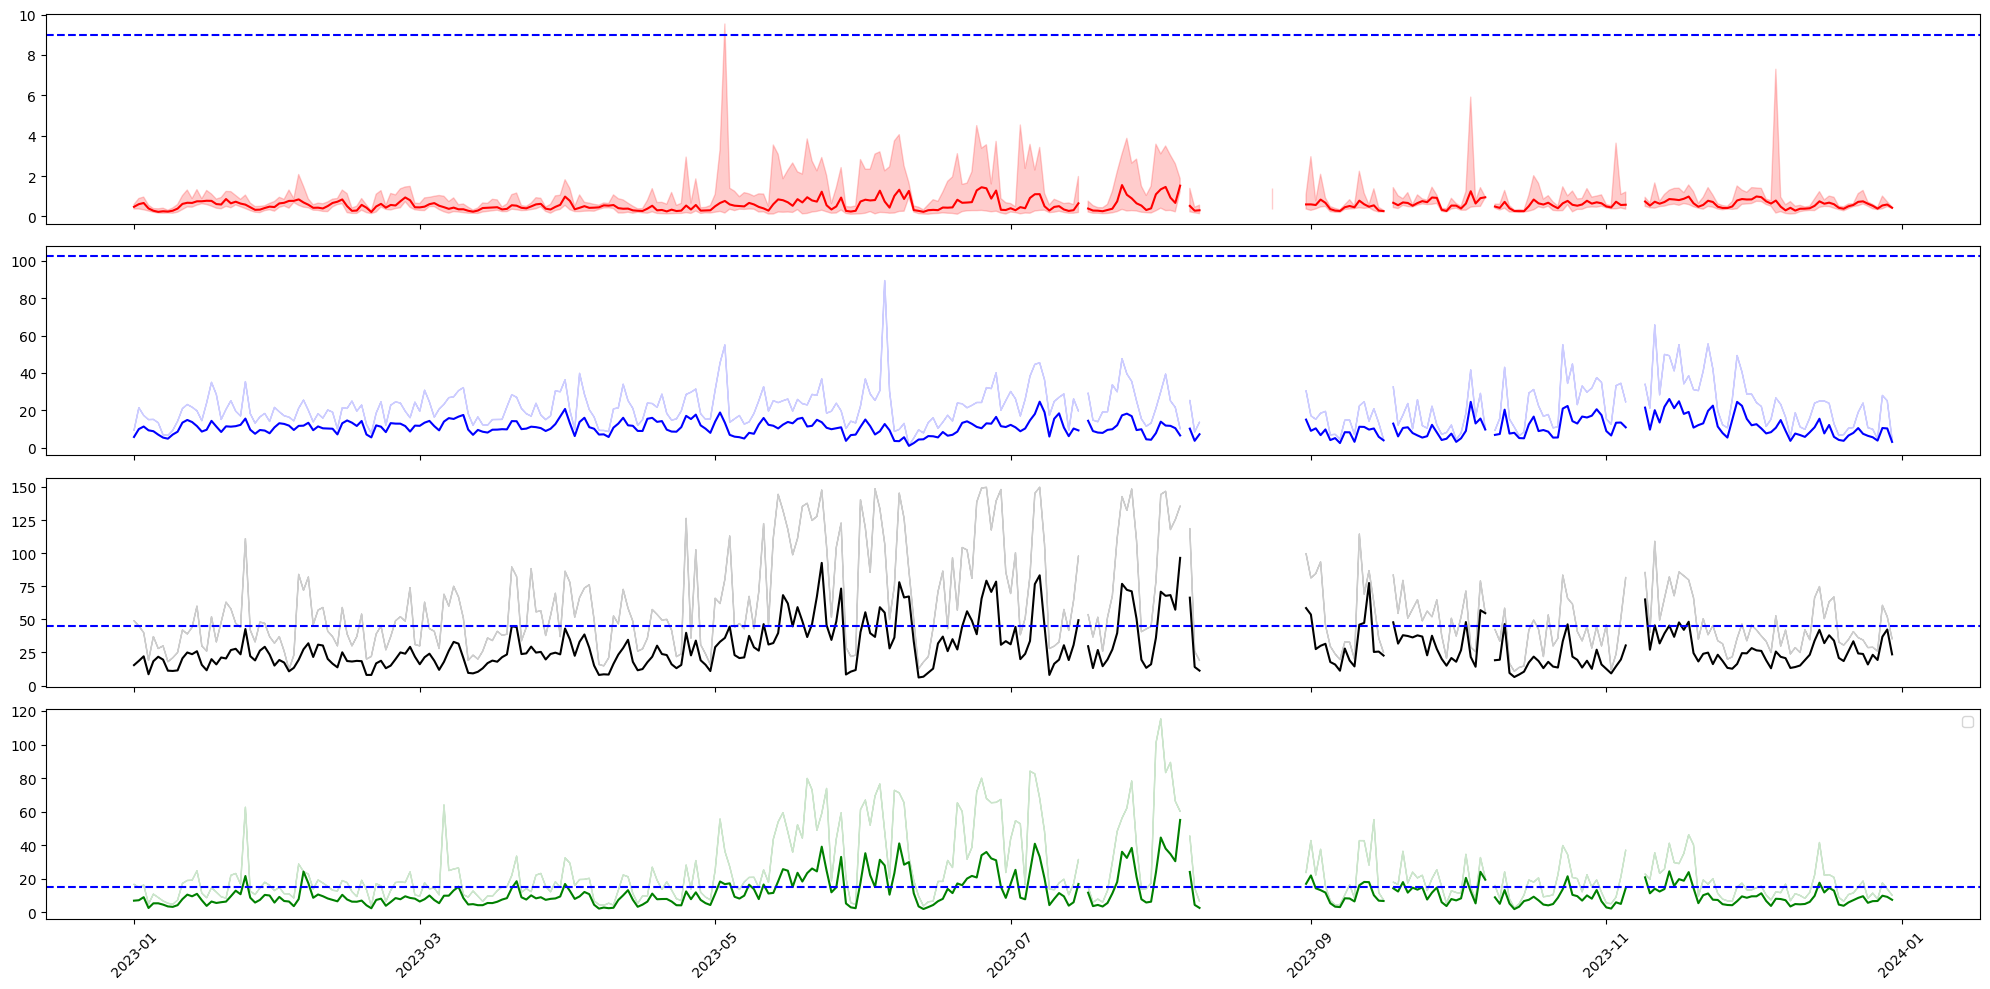

In [47]:
# Nao simplificado
df_co = df_PR012.query('Poluente =="CO"')
df_no2 = df_PR012.query('Poluente =="NO2"')
df_pm10 = df_PR012.query('Poluente == "PM10"')
df_PM25 = df_PR012.query('Poluente == "PM25"')

df_no2 = df_PR012.query('Poluente =="NO2"')
df_pm10 = df_PR012.query('Poluente == "PM10"')
df_PM25 = df_PR012.query('Poluente == "PM25"')
df_co.head()

# Calcula a média, mínima e máxima diária
media_diaria_co = df_co['Valor'].resample('D').mean()
min_diaria_co = df_co['Valor'].resample('D').min()
max_diaria_co = df_co['Valor'].resample('D').max()

# Calcula a média, mínima e máxima diária
media_diaria_no2 = df_no2['Valor'].resample('D').mean()
min_diaria_no2 = df_no2['Valor'].resample('D').min()
min_diaria_no2 = df_no2['Valor'].resample('D').max()

# Calcula a média, mínima e máxima diária
media_diaria_pm10 = df_pm10['Valor'].resample('D').mean()
min_diaria_pm10 = df_pm10['Valor'].resample('D').min()
min_diaria_pm10 = df_pm10['Valor'].resample('D').max()

# Calcula a média, mínima e máxima diária
media_diaria_PM25 = df_PM25['Valor'].resample('D').mean()
min_diaria_PM25 = df_PM25['Valor'].resample('D').min()
min_diaria_PM25 = df_PM25['Valor'].resample('D').max()


fig,ax = plt.subplots(4, 1,sharex=True,figsize = (20,10))

ax[0].plot(media_diaria_co.index,media_diaria_co,color='red')
ax[0].fill_between(media_diaria_co.index, min_diaria_co, max_diaria_co, color='red', alpha=0.2)

ax[1].plot(media_diaria_no2.index,media_diaria_no2,color='blue')
ax[1].fill_between(media_diaria_no2.index, min_diaria_no2, min_diaria_no2, color='blue', alpha=0.2)

ax[2].plot(media_diaria_pm10.index,media_diaria_pm10,color='black')
ax[2].fill_between(media_diaria_pm10.index, min_diaria_pm10, min_diaria_pm10, color='black', alpha=0.2)

ax[3].plot(media_diaria_PM25.index,media_diaria_PM25,color='green')
ax[3].fill_between(media_diaria_PM25.index, min_diaria_PM25, min_diaria_PM25, color='green', alpha=0.2)


ax[3].tick_params(axis='x', rotation=45)

plt.legend()

ax[0].axhline(y= 9, color='blue', linestyle='--', label='Limite CO')
ax[1].axhline(y=102.79, color='blue', linestyle='--', label='Limite NO2')
ax[2].axhline(y=45, color='blue', linestyle='--', label='Limite PM10')
ax[3].axhline(y=15, color='blue', linestyle='--', label='Limite PM2.5')

plt.tight_layout()
plt.show()


- Simplificado

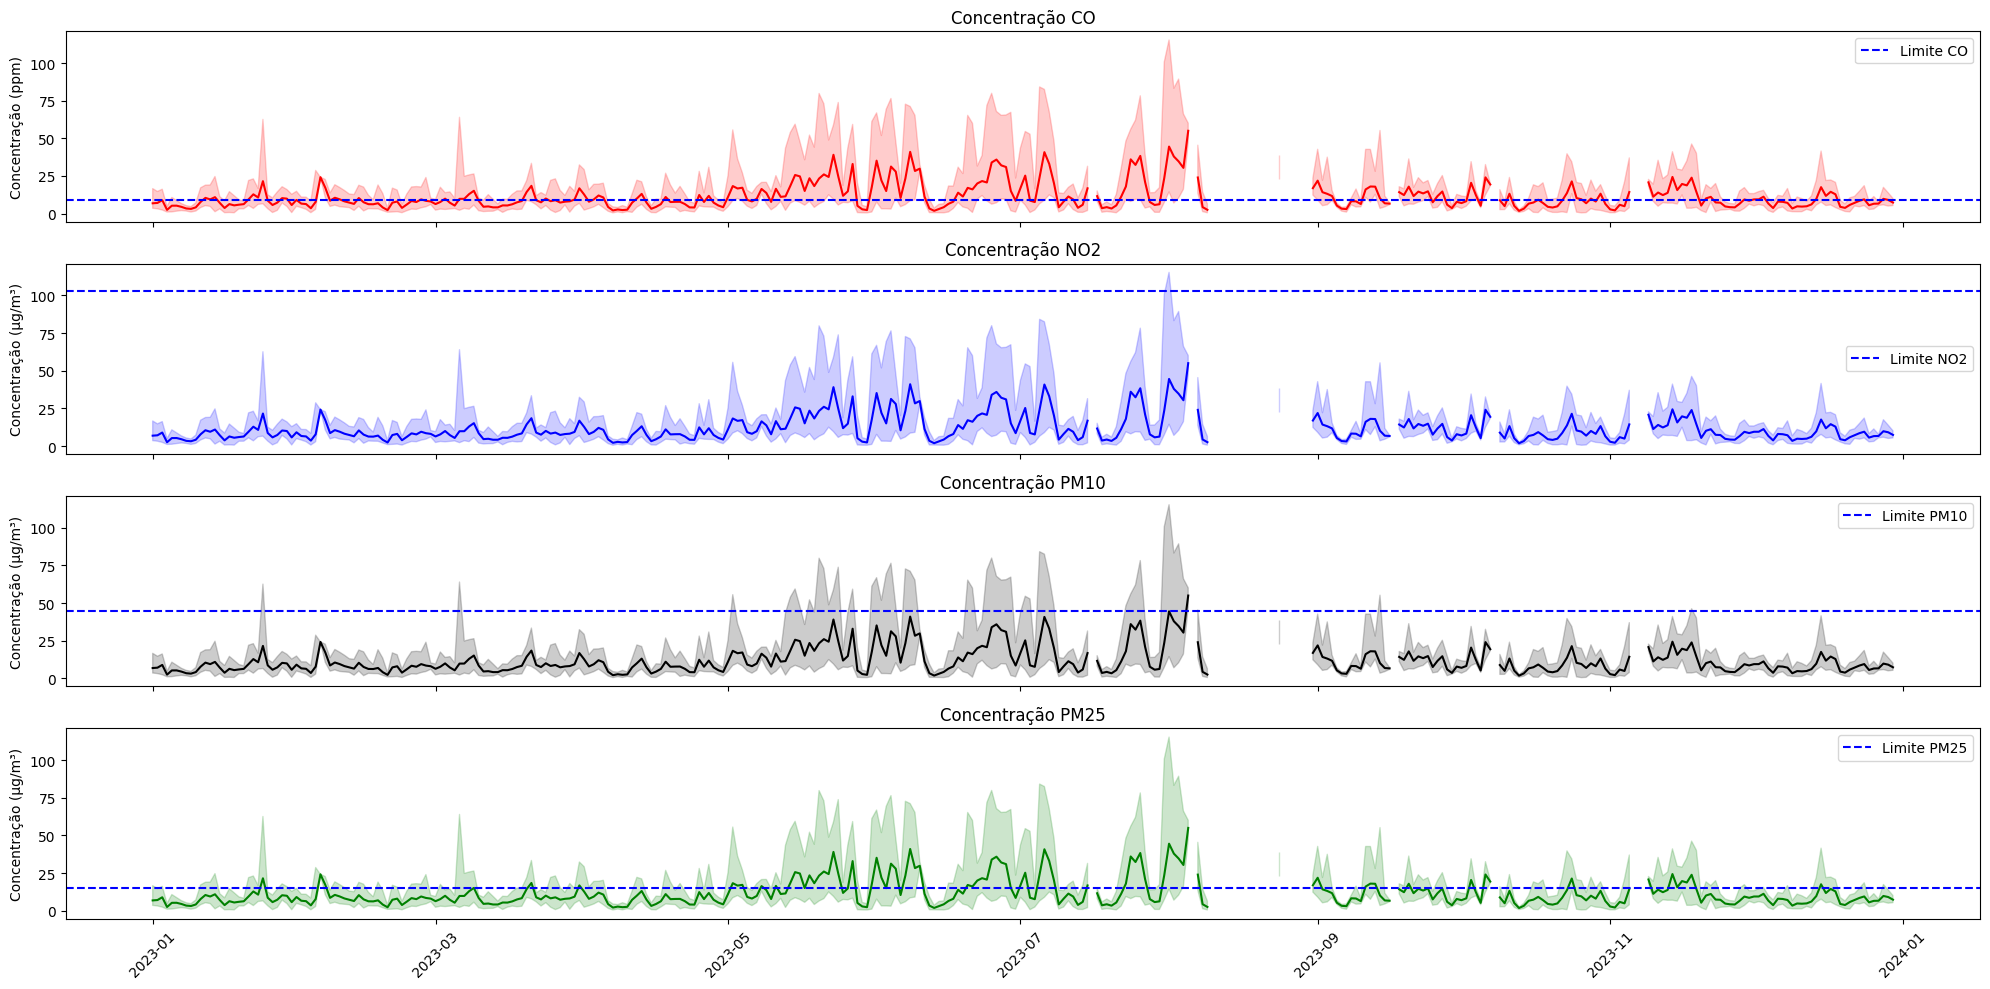

In [48]:

# Lista de poluentes com suas propriedades
poluentes = {
    "CO": ('red', 9, 'ppm'),
    "NO2": ('blue', 102.79, 'µg/m³'),
    "PM10": ('black', 45, 'µg/m³'),
    "PM25": ('green', 15, 'µg/m³')
}

# Criando subplots
fig, ax = plt.subplots(len(poluentes), 1, sharex=True, figsize=(20, 10))

# Processando e plotando os dados
for i, (poluente, (color, limite, unidade)) in enumerate(poluentes.items()):
    dff = df_PR012.query(f'Poluente == "{poluente}"')
    
    media_diaria = df['Valor'].resample('D').mean()
    min_diaria = df['Valor'].resample('D').min()
    max_diaria = df['Valor'].resample('D').max()

    ax[i].plot(media_diaria.index, media_diaria, color=color)
    ax[i].fill_between(media_diaria.index, min_diaria, max_diaria, color=color, alpha=0.2)
    ax[i].axhline(y=limite, color='blue', linestyle='--', label=f'Limite {poluente}')
    
    ax[i].set_title(f'Concentração {poluente}')
    ax[i].set_ylabel(f'Concentração ({unidade})')
    ax[i].legend()

# Ajustando o eixo x do último subplot
ax[-1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [55]:
df_co

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 17:00:00,2023,12,30,17,0,CIC,PR_012,CO,0.43,ppm,Automatico,referencia
2023-12-30 18:00:00,2023,12,30,18,0,CIC,PR_012,CO,0.43,ppm,Automatico,referencia
2023-12-30 19:00:00,2023,12,30,19,0,CIC,PR_012,CO,0.42,ppm,Automatico,referencia


In [110]:
print(df[(df['Codigo'] == 'PR_012') & (df['Poluente'] == 'CO')].head())

    Ano  Mes  Dia  Hora  Minuto Estacao  Codigo Poluente Valor Unidade  \
0  2023    1    1     0       0     CIC  PR_012       CO  0.48     ppm   
1  2023    1    1     1       0     CIC  PR_012       CO  0.49     ppm   
2  2023    1    1     2       0     CIC  PR_012       CO  0.45     ppm   
3  2023    1    1     3       0     CIC  PR_012       CO  0.38     ppm   
4  2023    1    1     4       0     CIC  PR_012       CO  0.41     ppm   

         Tipo    Testacao  
0  Automatico  referencia  
1  Automatico  referencia  
2  Automatico  referencia  
3  Automatico  referencia  
4  Automatico  referencia  


In [114]:
dd.

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
1,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
3,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
4,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
8732,2023,12,30,20,0,CIC,PR_012,CO,0.39,ppm,Automatico,referencia
8733,2023,12,30,21,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
8734,2023,12,30,22,0,CIC,PR_012,CO,insufic,ppm,Automatico,referencia
8735,2023,12,30,23,0,CIC,PR_012,CO,insufic,ppm,Automatico,referencia


,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
1,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
3,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
4,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
262105,2023,12,30,20,0,SIX,PR_013,SO2,2.88,ppb,Automatico,referencia
262106,2023,12,30,21,0,SIX,PR_013,SO2,3.27,ppb,Automatico,referencia
262107,2023,12,30,22,0,SIX,PR_013,SO2,insufic,ppb,Automatico,referencia
262108,2023,12,30,23,0,SIX,PR_013,SO2,insufic,ppb,Automatico,referencia


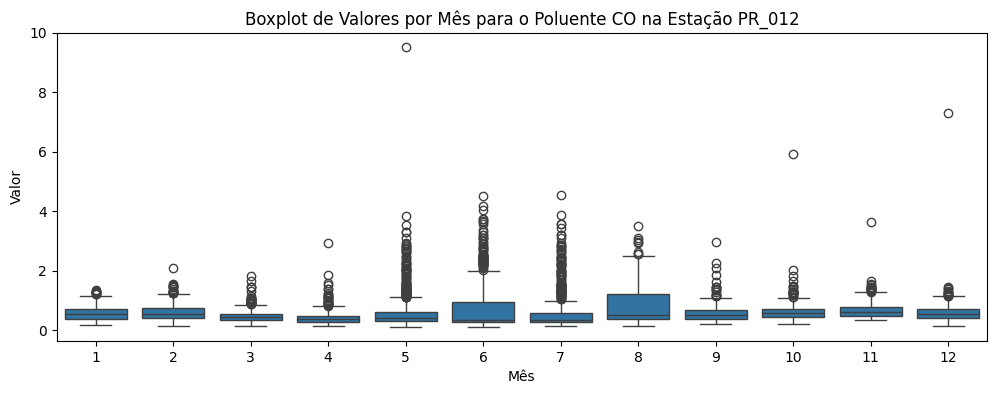

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 4))
sns.boxplot(x='Mes',y='Valor', data=df[(df['Codigo'] == 'PR_012') & (df['Poluente'] == 'CO')], ax=ax)
plt.xlabel('Mês')  # Adicionar rótulo ao eixo x
plt.ylabel('Valor')  # Adicionar rótulo ao eixo y
plt.title('Boxplot de Valores por Mês para o Poluente CO na Estação PR_012')
plt.show()

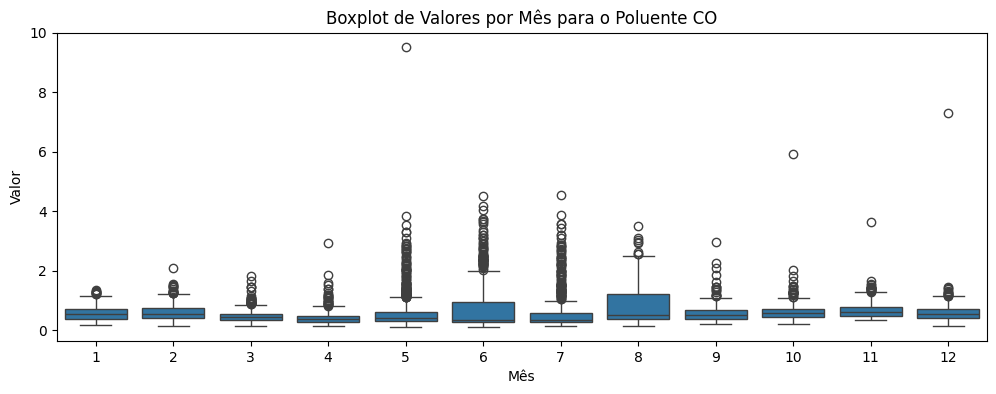

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 4))
sns.boxplot(x='Mes', y='Valor', data=df_PR012[df_PR012['Poluente'] == 'CO'], ax=ax)
plt.xlabel('Mês')  # Adicionar rótulo ao eixo x
plt.ylabel('Valor')  # Adicionar rótulo ao eixo y
plt.title('Boxplot de Valores por Mês para o Poluente CO')  # Adicionar título
plt.show()

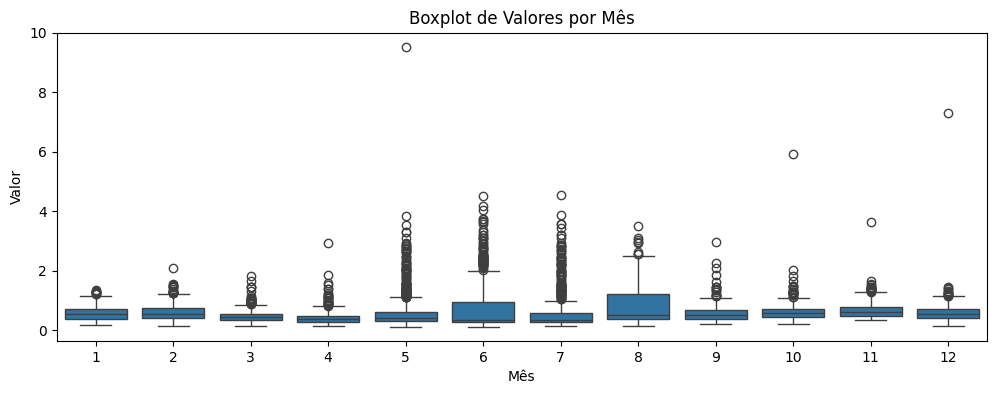

In [75]:

fig, ax = plt.subplots()
fig.set_size_inches((12, 4))
sns.boxplot(x='Mes', y='Valor', data=df_co, ax=ax)  # Usar 'Valor' como y
plt.xlabel('Mês')  # Adicionar rótulo ao eixo x
plt.ylabel('Valor')  # Adicionar rótulo ao eixo y
plt.title('Boxplot de Valores por Mês')  # Adicionar título
plt.show()

C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_26564\3477878446.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_co['Valor'], patch_artist=True, labels=['M'])


Text(0.5, 0, 'Poluente')

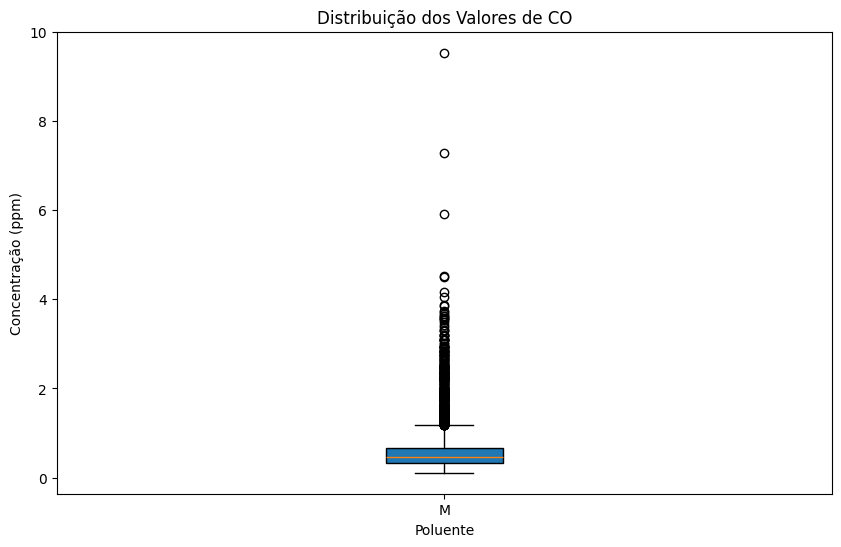

In [64]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_co['Valor'], patch_artist=True, labels=['M'])

plt.title('Distribuição dos Valores de CO')
plt.ylabel('Concentração (ppm)')
plt.xlabel('Poluente')

In [ ]:
df_co = df_PR012[df_PR012['Poluente'] == 'CO']

In [ ]:
df_co


Plotando o grafico de linha em comparação com o limite da CONAMA 491/2018 para CO

In [ ]:
media_d_co = cf_co

In [ ]:
df_co['Valor'].max()

In [ ]:
df.groupby(by = ['Codigo'])[['Valor']].mean()

In [ ]:
df.groupby(by = ['Poluente'])[['Valor']].mean()

In [ ]:
df.loc[df['Poluente'] =='SO2'] ['Valor']